# Programming for Data Analysis Project

In [180]:
# Importing packages
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

## Proposal

Based on real world data, analyse, and synthesize a dataset. Based on this synthetization show if either adult men or women are more likely to be overweight, using their height, weight and BMI


### What is the definition of being overweight?

In simple terms, according with the [WHO](https://www.who.int/news-room/fact-sheets/detail/obesity-and-overweight#:~:text=For%20adults%2C%20WHO%20defines%20overweight,than%20or%20equal%20to%2030.), <i>overweight and obesity are defined as abnormal or excessive fat accumulation that may impair health</i>.


But how do we determine if someone is overweight, or in other words have excessive fat accumulation in their body? For that we use a index called BMI

### What is BMI

BMI stands for <i>Body mass index</i>. It is a simple index commonly used to classify if someone fits the overweight/obese or underweight spectrum. 

For Adults, if a person has a BMI greater than or equal to 25, they will be considered overweight. If their BMI is over 30, they will be considered obese. BMI provide a broad idea of a individual health and body fat situation and its table of classification is the same for both males and females. Because of that it is a good screening too, however it does not mean that both individuals with the same BMI will be affected the same way.

#### Why BMI is important and what a High BMI can tell about an individual?

BMI indices are often used as screening toll, by looking at a person BMI you can have a idea of the person, body fat ratio and asses if the individual may be on risk of getting affected for disease such as:
-	cardiovascular diseases
-	diabetes
-	and even some cancers
 

#### How BMI is calculate and BMI rates.

The formula to calculate a individual BMI is the person's weight in kilograms(kg) divided by the square of his height in meters.

In [181]:
# Simple BMI calculation
# Height in Meters an weight in kg
height = 1.76
weight = 70

bmi = (weight) / (height)**2
print("Your BMI index is: {:.2f}".format(bmi))

Your BMI index is: 22.60


Using the [CDC BMI Table](https://www.cdc.gov/obesity/basics/adult-defining.html), the individual above would be classified as having a healthy weight.

- BMI is less than 18.5, it falls within the underweight range.
- If your BMI is 18.5 to <25, it falls within the healthy weight range.
- If your BMI is 25.0 to <30, it falls within the overweight range.
- If your BMI is 30.0 or higher, it falls within the obesity range.

# Dataset

The dataset used was the [Finger Print Dataset](https://repository.lboro.ac.uk/articles/dataset/Height_weight_and_fingerprint_measurements_collected_from_200_participants/7539206) from the University of Loughtborough, authored by **Beth McMurchie**, **George TorrensGeorge Torrens** and **Paul Kelly**.

This dataset deals with the regression analysis to prove whether or not there is a relationship between the individual physical stature and their fingerprint size. Most of the dataset data was dropped as it was unrelated to the proposal of this project, the only data kept was the gender, height and weight of the participants.
You can see a snapshot of the original dataset below

In [182]:
# Importing Database
df = pd.read_excel('200_participant_collected_data.xlsx')
df.head(10)

,Participant Number,Gender,Age,Dominant Hand,Height (cm) (average of 3 measurments),Weight (kg) (average of 3 measurements),Fingertip Temperature (°C),Fingerprint Height (mm),Fingerprint Width (mm),Fingerprint Area (mm2),Fingerprint Circumference (mm)
0,101,Male,NaN,Right,174.000000,70.000000,34.0,19.8,13.7,240.6,57.7
1,102,Male,NaN,Right,202.000000,99.000000,30.0,24.0,14.1,278.8,62.7
2,103,Male,NaN,Right,182.333333,82.000000,29.0,20.0,13.7,223.8,55.5
3,104,Male,NaN,Right,184.000000,75.000000,29.0,23.2,14.0,281.8,63.3
4,105,Male,18.0,Right,180.666667,80.333333,29.0,22.7,15.0,286.7,62.7
5,106,Male,20.0,Right,180.000000,59.000000,32.0,24.3,14.0,299.0,65.6
6,107,Female,NaN,Right,169.666667,71.000000,28.0,20.0,15.0,252.7,58.0
7,108,Male,NaN,Right,192.000000,81.000000,28.0,20.6,13.4,238.6,58.0
8,109,Male,NaN,Right,186.666667,74.000000,26.0,24.1,16.3,333.2,67.6
9,110,Male,NaN,Right,187.666667,85.000000,32.0,22.6,14.6,286.2,63.6


In [183]:
df.describe()

,Participant Number,Age,Height (cm) (average of 3 measurments),Weight (kg) (average of 3 measurements),Fingertip Temperature (°C),Fingerprint Height (mm),Fingerprint Width (mm),Fingerprint Area (mm2),Fingerprint Circumference (mm)
count,200.000000,180.000000,200.000000,200.000000,184.000000,200.000000,200.000000,200.00000,200.0000
mean,200.500000,21.227778,173.170000,72.635000,28.690217,20.363500,13.487000,233.55300,56.5745
std,57.879185,4.728176,9.495657,14.245734,3.375695,2.032331,1.471754,43.52727,5.3133
min,101.000000,18.000000,148.000000,44.000000,22.000000,15.600000,9.900000,140.00000,44.2000
25%,150.750000,19.000000,167.250000,61.000000,26.000000,19.000000,12.300000,199.65000,52.6750
50%,200.500000,20.000000,173.000000,71.333333,29.000000,20.450000,13.600000,232.70000,56.6500
75%,250.250000,22.000000,180.000000,80.083333,31.000000,21.925000,14.500000,267.47500,60.7250
max,300.000000,56.000000,202.000000,122.666667,35.000000,25.800000,17.100000,358.90000,70.5000


In [184]:
df.loc[df['Gender'] == 'Male'].describe()

,Participant Number,Age,Height (cm) (average of 3 measurments),Weight (kg) (average of 3 measurements),Fingertip Temperature (°C),Fingerprint Height (mm),Fingerprint Width (mm),Fingerprint Area (mm2),Fingerprint Circumference (mm)
count,113.000000,103.000000,113.000000,113.000000,104.000000,113.000000,113.000000,113.000000,113.000000
mean,201.504425,21.106796,178.474926,78.115044,29.038462,21.315929,14.309735,258.111504,59.562832
std,56.473465,3.217332,7.018796,11.881589,3.375880,1.601203,1.060994,31.758347,3.797231
min,101.000000,18.000000,164.000000,56.000000,22.000000,17.400000,12.000000,194.500000,51.800000
25%,156.000000,19.000000,173.000000,69.333333,26.750000,20.100000,13.600000,234.800000,56.800000
50%,209.000000,21.000000,177.666667,76.666667,30.000000,21.200000,14.200000,255.000000,59.500000
75%,248.000000,22.000000,183.666667,85.666667,31.250000,22.300000,14.900000,282.200000,62.400000
max,299.000000,41.000000,202.000000,112.000000,35.000000,25.800000,17.100000,358.900000,70.500000


In [185]:
df.loc[df['Gender'] == 'Female'].describe()

,Participant Number,Age,Height (cm) (average of 3 measurments),Weight (kg) (average of 3 measurements),Fingertip Temperature (°C),Fingerprint Height (mm),Fingerprint Width (mm),Fingerprint Area (mm2),Fingerprint Circumference (mm)
count,83.000000,73.000000,83.000000,83.000000,76.000000,83.000000,83.000000,83.000000,83.000000
mean,199.855422,21.424658,165.827309,64.807229,28.289474,19.033735,12.316867,198.837349,52.421687
std,61.282459,6.387744,7.485915,13.455046,3.273391,1.757581,1.146875,31.959814,4.230668
min,107.000000,18.000000,148.000000,44.000000,22.000000,15.600000,9.900000,140.000000,44.200000
25%,146.500000,19.000000,161.166667,56.000000,26.000000,17.500000,11.600000,175.800000,49.350000
50%,187.000000,19.000000,166.000000,61.000000,29.000000,19.000000,12.100000,196.000000,51.900000
75%,263.500000,21.000000,170.000000,71.166667,31.000000,20.400000,12.950000,213.050000,54.700000
max,300.000000,56.000000,185.666667,122.666667,34.000000,23.900000,15.800000,285.600000,63.600000


## Cleaning and Adptating the Dataset

If you pay attention, the number of row  on the male and female database slice, does not add up to 200, which is the total amount of rows from the original dataframe. That is because some of the male gender field are written down in lower case. 

In [186]:
df.loc[df['Gender'] == 'male']

,Participant Number,Gender,Age,Dominant Hand,Height (cm) (average of 3 measurments),Weight (kg) (average of 3 measurements),Fingertip Temperature (°C),Fingerprint Height (mm),Fingerprint Width (mm),Fingerprint Area (mm2),Fingerprint Circumference (mm)
72,173,male,22.0,right,174.000000,102.000000,28.0,22.3,14.6,274.6,62.2
76,177,male,21.0,right,186.000000,87.666667,34.0,24.8,15.8,332.6,63.4
94,195,male,20.0,right,170.000000,60.000000,23.0,19.6,13.6,222.2,54.8
96,197,male,20.0,right,172.666667,71.333333,24.0,17.5,14.1,211.1,52.9


In [187]:
# Fixing the spelling
df['Gender'].loc[df['Gender'] == 'male'] = 'Male'

C:\Users\renan\AppData\Local\Temp\ipykernel_24700\6966063.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'].loc[df['Gender'] == 'male'] = 'Male'


Since we will only be looking at an individual height, weight, and gender we are going to drop all the other columns. However, this dataset does not have each individual BMI but since we know how to calculate it we are going to create a new column and populate it with their BMI values

In [188]:
# Cleaning the columns that we are not going to use and renaming the height and weight columns
df = df.drop(columns=['Participant Number', 'Age','Dominant Hand', 'Fingertip Temperature (°C)', 'Fingerprint Height (mm)','Fingerprint Width (mm)', 'Fingerprint Area (mm2)', 'Fingerprint Circumference (mm)'])
df.rename(columns={'Height (cm) (average of 3 measurments)': 'Height', 'Weight (kg) (average of 3 measurements)': 'Weight'}, inplace=True)

In [189]:
#Checking if there is any Null value
df.isnull().values.sum()

0

In [190]:
# Calculating the BMI of Males (Dividing the Height by 100 to convert from cm to m)
male_height = df['Height'].loc[df['Gender'] == 'Male']
male_weight =df['Weight'].loc[df['Gender'] == 'Male'] 
bmi_males = male_weight / (male_height/100)**2
bmi_males

0      23.120624
1      24.262327
2      24.665033
3      22.152647
4      24.611593
         ...    
189    36.753650
192    26.165895
196    25.576888
197    20.918659
198    26.112989
Length: 117, dtype: float64

In [191]:
# Calculating the BMI of Females (Dividing the Height by 100 to convert from cm to m)
female_height = df['Height'].loc[df['Gender'] == 'Female']
female_weight =df['Weight'].loc[df['Gender'] == 'Female'] 
bmi_female = female_weight / (female_height/100)**2
bmi_female

6      24.664101
13     17.625381
14     23.875433
15     18.929151
16     26.116974
         ...    
191    23.352841
193    31.505986
194    20.415225
195    24.662899
199    26.568717
Length: 83, dtype: float64

In [192]:
# Adding the new BMI column
df.insert(3, "BMI", 0)

In [193]:
#Populating the Males and Females with their BMI value
df['BMI'].loc[df['Gender'] == 'Male'] = bmi_males
df['BMI'].loc[df['Gender'] == 'Female'] = bmi_female


C:\Users\renan\AppData\Local\Temp\ipykernel_24700\2469629272.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BMI'].loc[df['Gender'] == 'Male'] = bmi_males


In [194]:
# Visualizing the Final dataframe
df

,Gender,Height,Weight,BMI
0,Male,174.000000,70.000000,23.120624
1,Male,202.000000,99.000000,24.262327
2,Male,182.333333,82.000000,24.665033
3,Male,184.000000,75.000000,22.152647
4,Male,180.666667,80.333333,24.611593
...,...,...,...,...
195,Female,164.000000,66.333333,24.662899
196,Male,172.000000,75.666667,25.576888
197,Male,174.000000,63.333333,20.918659
198,Male,174.666667,79.666667,26.112989


In [195]:
#Checking again if all the field are populated
df.isnull().values.sum()

0

In [196]:
df.describe()

,Height,Weight,BMI
count,200.000000,200.000000,200.000000
mean,173.170000,72.635000,24.164830
std,9.495657,14.245734,4.132132
min,148.000000,44.000000,17.030709
25%,167.250000,61.000000,21.411034
50%,173.000000,71.333333,23.574673
75%,180.000000,80.083333,25.976054
max,202.000000,122.666667,44.753187


Quick analisys on the real world data to find the information that we are going to simulated data
the first step is to break down the dataframe between males and females as they have different heights and weight.

**Average Height**
<b>

According to [World Data](https://www.worlddata.info/average-bodyheight.php) website, the average height for a man from UK is 1.78 meters and for a woman from UK is 1.64 meters
    
**Average Weight**
<b>

According to [World Data](https://www.worlddata.info/average-bodyheight.php) website, the average Weight for a man from UK is 86.7 kg and for a woman from UK is 72.7 kg.

In [197]:
# Breaking the DF into males and females
males = df.loc[df['Gender'] == 'Male']
females = df.loc[df['Gender'] == 'Female']

In [198]:
males.describe()

,Height,Weight,BMI
count,117.000000,117.000000,117.000000
mean,178.378917,78.188034,24.578041
std,7.009013,12.051087,3.596263
min,164.000000,56.000000,18.209877
25%,173.000000,69.333333,21.787113
50%,177.333333,76.666667,24.324145
75%,183.666667,86.000000,26.528258
max,202.000000,112.000000,36.753650


From the information above we can see that the mean for males is on point with the research made and the information found on World Data website. For the weight on the other hand there some differences between our data and the data found online the cause of that could be several factors

In [199]:
females.describe()

,Height,Weight,BMI
count,83.000000,83.000000,83.000000
mean,165.827309,64.807229,23.582352
std,7.485915,13.455046,4.749133
min,148.000000,44.000000,17.030709
25%,161.166667,56.000000,21.010412
50%,166.000000,61.000000,22.590270
75%,170.000000,71.166667,24.826829
max,185.666667,122.666667,44.753187


The same happens with the females data

Now lets plot the height and weight data from each group and see what what information can we get from that.

<AxesSubplot:xlabel='Weight', ylabel='Count'>

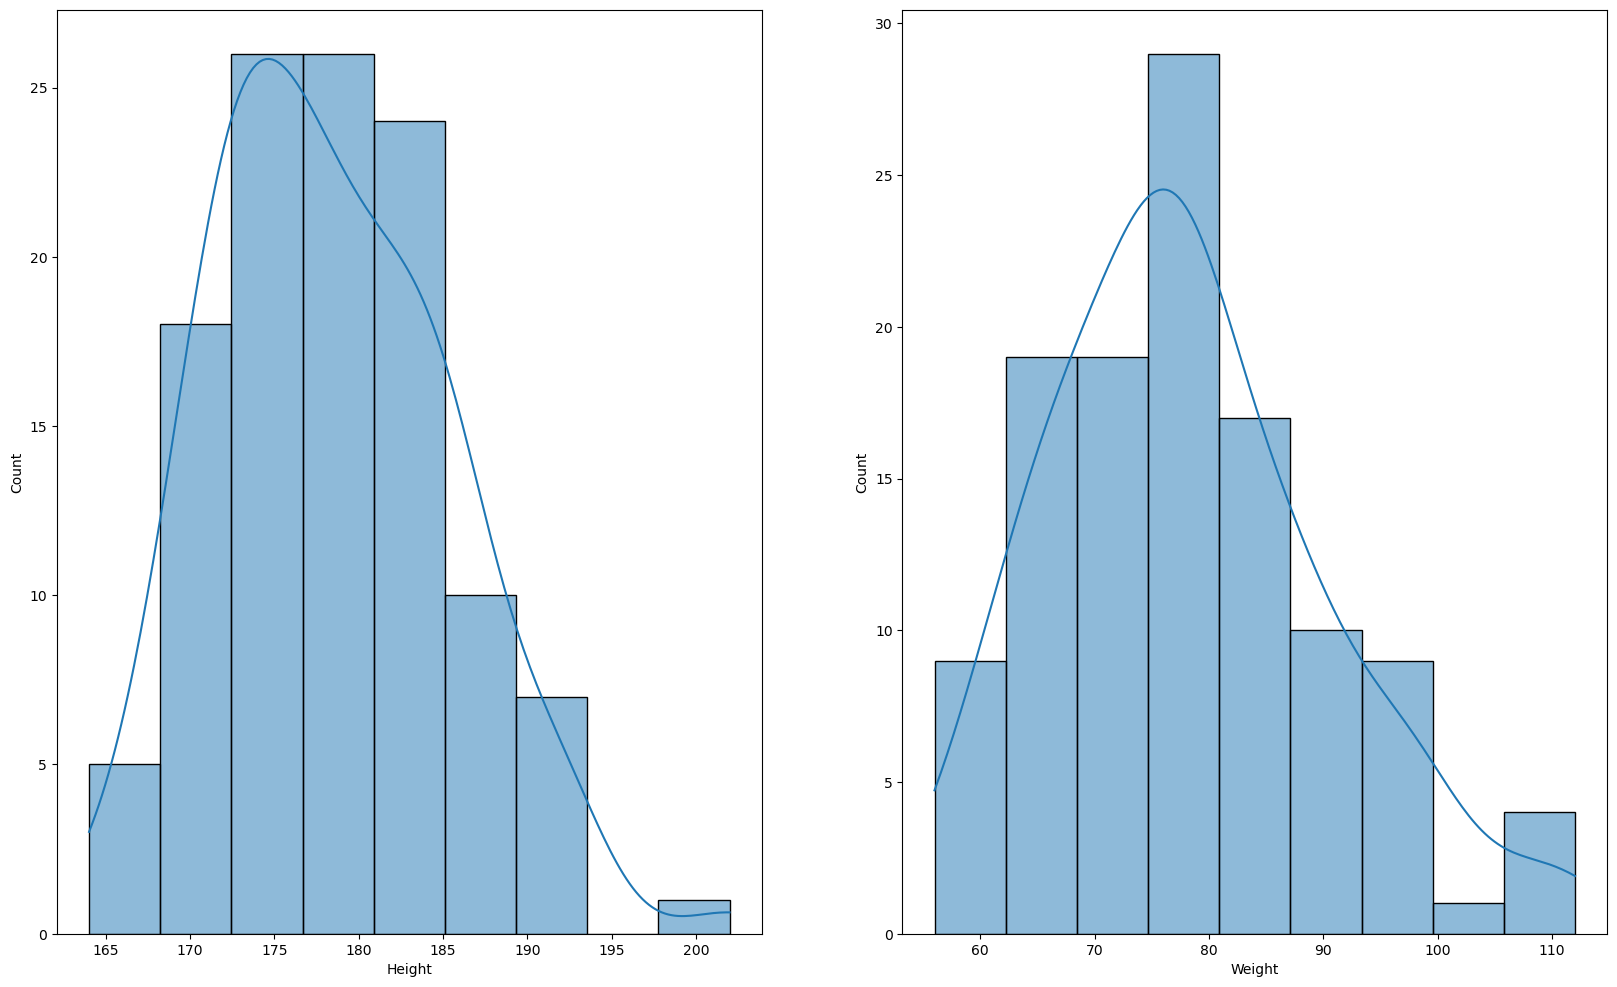

In [237]:
# Creating a dstribuition plot for height and weight for males
from scipy.stats import norm

fig, axs = plt.subplots(figsize=(20, 12), ncols=2)
sns.histplot(kde=True, data=males['Height'], ax=axs[0])
sns.histplot(kde=True, data=males['Weight'], ax=axs[1])


<AxesSubplot:xlabel='Weight', ylabel='Count'>

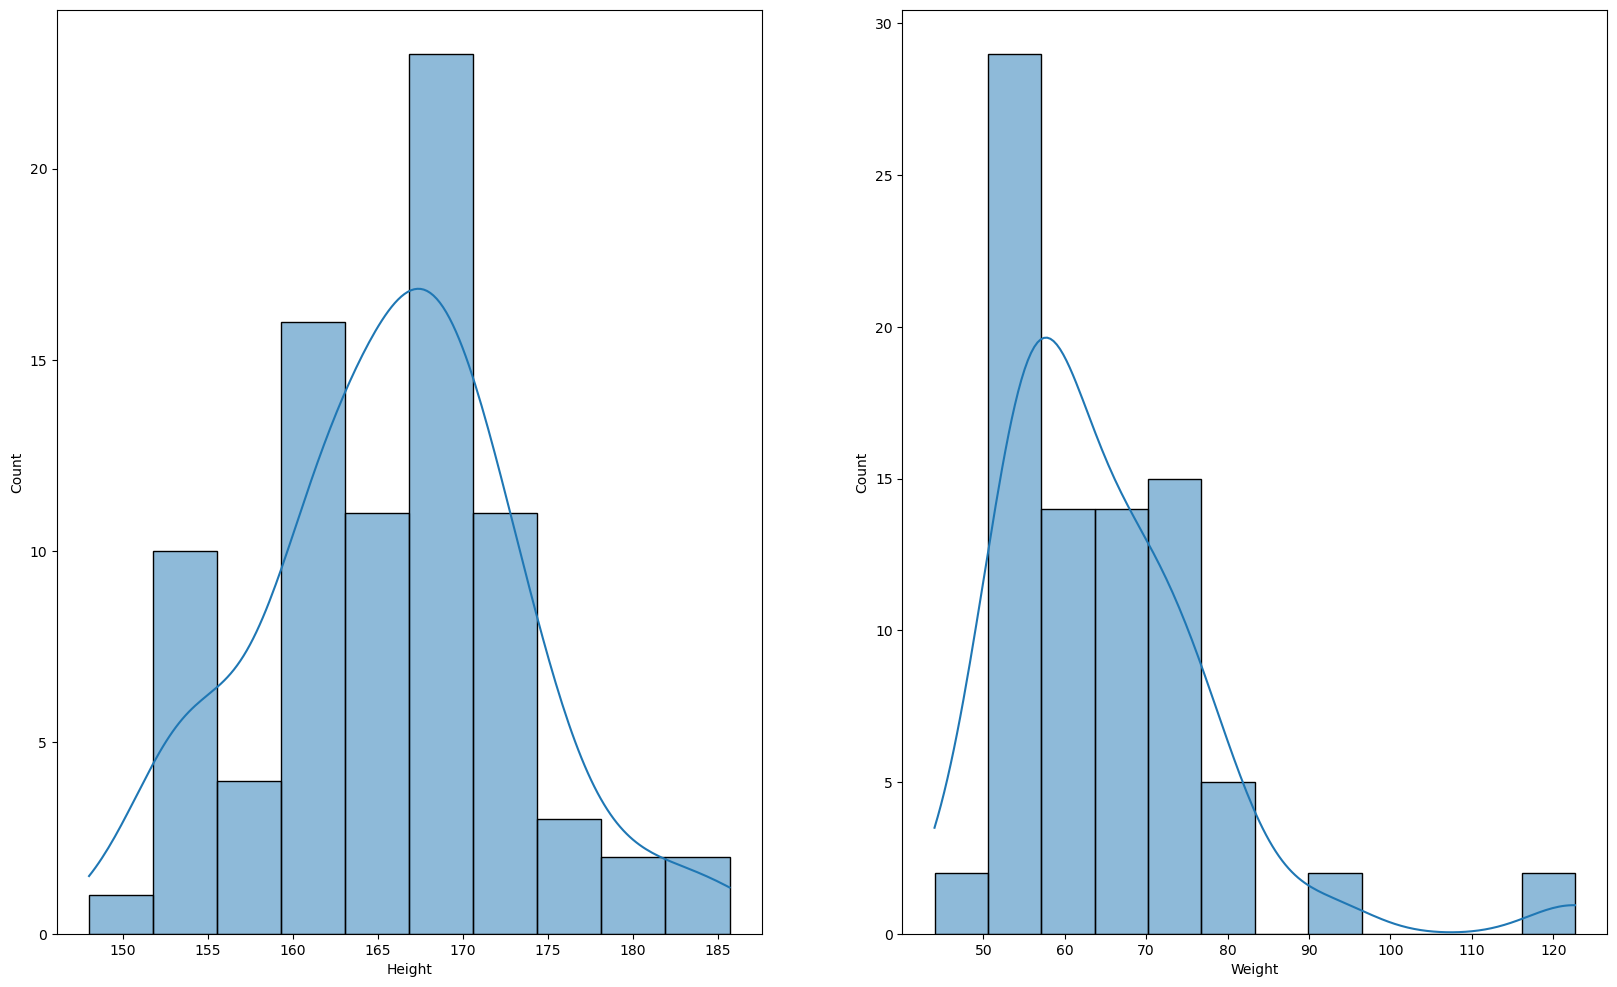

In [239]:
# Creating a dstribuition plot for height and weight for males

fig, axs = plt.subplots(figsize=(20, 12), ncols=2)
sns.histplot(kde=True, data=females['Height'], ax=axs[0])
sns.histplot(kde=True, data=females['Weight'], ax=axs[1])

In [151]:
stats.skew(females['Weight'])

2.054547163455607

In [152]:
stats.skew(males['Weight'])

0.6035798317506017